<a href="https://colab.research.google.com/github/ChinmayRaspaile/MachineLearning/blob/main/MLLAB_5_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('car_evaluation.csv')

In [ ]:
data.shape

(1727, 7)

In [ ]:
data.head()


vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
data.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
  print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
data['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = data.drop(['class'], axis = 1)
Y = data['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
X_train.head()

buying  maint  doors persons lug_boot safety
83    vhigh  vhigh  5more       2      med    low
48    vhigh  vhigh      3    more      med    med
468    high  vhigh      3       4    small    med
155   vhigh   high      3    more      med    low
1043    med   high      4    more    small    low

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint','doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

buying  maint  doors  persons  lug_boot  safety
83         1      1      1        1         1       1
48         1      1      2        2         1       2
468        2      1      2        3         2       2
155        1      2      2        2         1       1
1043       3      2      3        2         2       1

In [ ]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
599        2      2      3        1         3       1
932        3      1      3        3         3       1
628        2      2      1        1         3       3
1497       4      2      1        3         1       2
1262       3      4      3        2         1       1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
Y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [ ]:
Y_pred_train_gini = clf_gini.predict(X_train)
Y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('training-set accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, Y_pred_train_gini)))


training-set accuracy score: 0.7848


In [ ]:
print('Training set score: {:4f}'.format(clf_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.784788
Test set score: 0.8053


In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, Y_train))

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

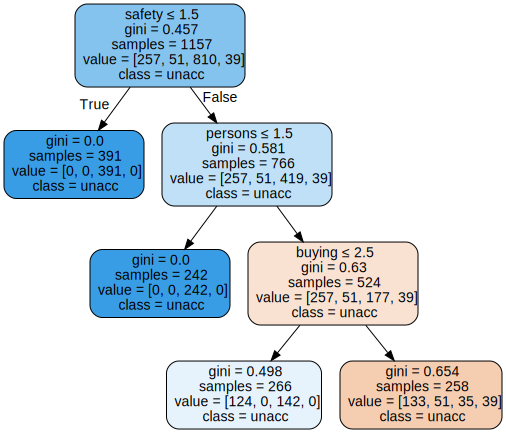

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns, class_names=Y_train,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth =3, random_state = 0)
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
Y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_en)))

model accuracy score with criterion entropy: 0.8053


In [ ]:
Y_pred_train_en = clf_en.predict(X_train)
Y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, Y_pred_train_en)))

Training-set accuracy score: 0.7848


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.7848
Test set score: 0.8053


In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, Y_train))

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

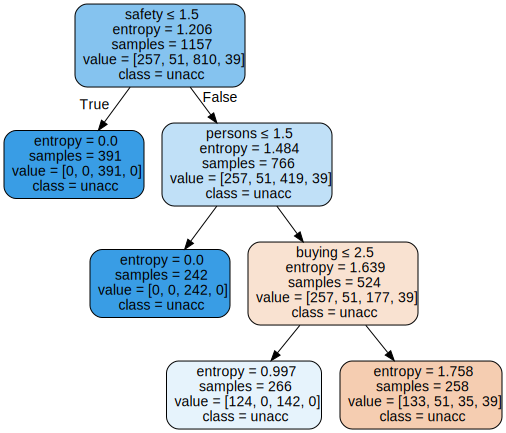

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None, feature_names= X_train.columns, class_names= Y_train,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570

